In [116]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE


import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

### 1. IMPORT DATASET FROM KAGGLE

In [25]:
songs = pd.read_csv('../data/top10s.csv', encoding="latin")

In [26]:
songs

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


### 2. CLEANING DATASET

In [27]:
songs.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
songs

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [29]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [30]:
songs.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [39]:
songs.rename(columns = {'top genre': 'genre'}, inplace = True)

In [40]:
songs

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [44]:
set(songs.genre)

{'acoustic pop',
 'alaska indie',
 'alternative r&b',
 'art pop',
 'atl hip hop',
 'australian dance',
 'australian hip hop',
 'australian pop',
 'barbadian pop',
 'baroque pop',
 'belgian edm',
 'big room',
 'boy band',
 'british soul',
 'brostep',
 'canadian contemporary r&b',
 'canadian hip hop',
 'canadian latin',
 'canadian pop',
 'candy pop',
 'celtic rock',
 'chicago rap',
 'colombian pop',
 'complextro',
 'contemporary country',
 'dance pop',
 'danish pop',
 'detroit hip hop',
 'downtempo',
 'edm',
 'electro',
 'electro house',
 'electronic trap',
 'electropop',
 'escape room',
 'folk-pop',
 'french indie pop',
 'hip hop',
 'hip pop',
 'hollywood',
 'house',
 'indie pop',
 'irish singer-songwriter',
 'latin',
 'metropopolis',
 'moroccan pop',
 'neo mellow',
 'permanent wave',
 'pop',
 'tropical house'}

In [107]:
df = songs.drop(songs[(songs.genre == 'alaska indie') | 
                      (songs.genre == 'alternative r&b') | 
                      (songs.genre == 'australian hip hop') | 
                      (songs.genre == 'canadian latin') | 
                      (songs.genre == 'celtic rock') | 
                      (songs.genre == 'chicago rap') | 
                      (songs.genre == 'contemporary country') |  
                      (songs.genre == 'danish pop') | 
                      (songs.genre == 'electro house') | 
                      (songs.genre == 'french indie pop') | 
                      (songs.genre == 'hollywood') | 
                      (songs.genre == 'house') | 
                      (songs.genre == 'irish singer-songwriter') | 
                      (songs.genre == 'metropopolis') | 
                      (songs.genre == 'moroccan pop')].index)                      

In [110]:
df

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [111]:
df.groupby("genre").nunique()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
genre,,,,,,,,,,,,,
acoustic pop,2,2,2,2,2,2,2,2,2,2,2,2,2
art pop,8,3,6,7,6,8,5,6,8,8,7,4,8
atl hip hop,4,3,3,4,3,4,3,4,4,4,4,4,4
australian dance,6,1,4,6,6,6,4,6,5,6,5,5,6
australian pop,5,2,4,5,5,5,2,5,5,5,3,5,5
barbadian pop,15,1,7,12,13,13,5,11,15,15,12,6,11
baroque pop,2,1,1,2,2,2,2,2,2,2,1,2,2
belgian edm,2,1,2,1,2,2,2,2,2,2,1,2,2
big room,10,7,7,9,9,9,7,7,10,10,9,4,9


In [161]:
titulos = df.drop(["year", "bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch", "pop"], axis=1)
titulos

,title,artist,genre
0,"Hey, Soul Sister",Train,neo mellow
1,Love The Way You Lie,Eminem,detroit hip hop
2,TiK ToK,Kesha,dance pop
3,Bad Romance,Lady Gaga,dance pop
4,Just the Way You Are,Bruno Mars,pop
...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop


In [187]:
titulos.to_csv('../data/genre.csv')

In [183]:
def genero_canciones(genero:str):
    pop = titulos[titulos.genre == genero]
    return (pop)

In [189]:
genero_canciones('dance pop')

,title,artist,genre
2,TiK ToK,Kesha,dance pop
3,Bad Romance,Lady Gaga,dance pop
6,Dynamite,Taio Cruz,dance pop
7,Secrets,OneRepublic,dance pop
10,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop
...,...,...,...
589,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop
594,No Guidance (feat. Drake),Chris Brown,dance pop
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop


In [174]:
pop = titulos[titulos['genre']=='pop']

In [175]:
pop

,title,artist,genre
4,Just the Way You Are,Bruno Mars,pop
11,Marry You,Bruno Mars,pop
23,Misery,Maroon 5,pop
54,Just the Way You Are,Bruno Mars,pop
57,Moves Like Jagger - Studio Recording From The ...,Maroon 5,pop
59,Grenade,Bruno Mars,pop
64,Marry You,Bruno Mars,pop
105,Locked Out of Heaven,Bruno Mars,pop
107,Payphone,Maroon 5,pop
109,I Knew You Were Trouble.,Taylor Swift,pop


In [171]:
genero_canciones(genero_canciones)

,title,artist,genre


In [123]:
df.drop(songs[songs['genre']==1].index)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [124]:
df.to_csv('../data/kagglemusic.csv')

### 3. VISUALIZATION 

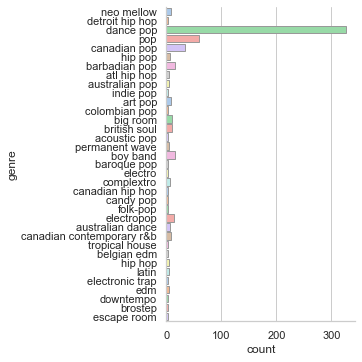

<function __main__.figura_1()>

In [143]:
# Aquí visualizo el número de canciones que hay de cada género
#figura = []
def figura_1():
    # plt.figure(figsize=(400,400))
    sns.catplot(y = "genre", kind = "count",
                palette = "pastel", edgecolor = ".6",
                data = df)
    plt.show()
    return(figura_1)
figura_1()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function __main__.figura_2()>

<Figure size 864x864 with 0 Axes>

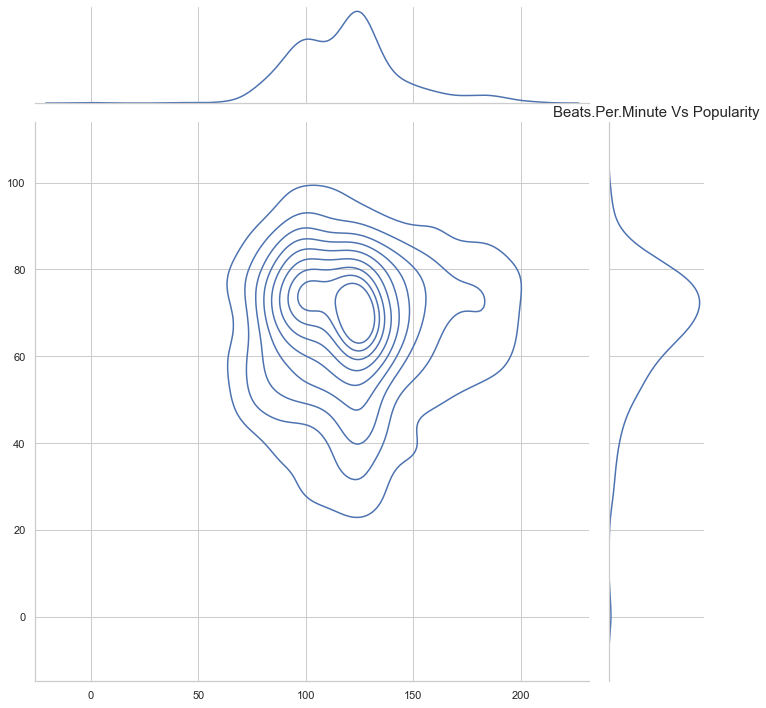

In [137]:
def figura_2():
    plt.figure(figsize=(12,12))
    sns.jointplot(x=df["bpm"].values, y=df['pop'].values, size=10, kind="kde",)
    plt.ylabel('pop', fontsize=12)
    plt.xlabel("bpm", fontsize=12)
    plt.title("Beats.Per.Minute Vs Popularity", fontsize=15);
    return(figura_2)
figura_2()

/usr/local/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


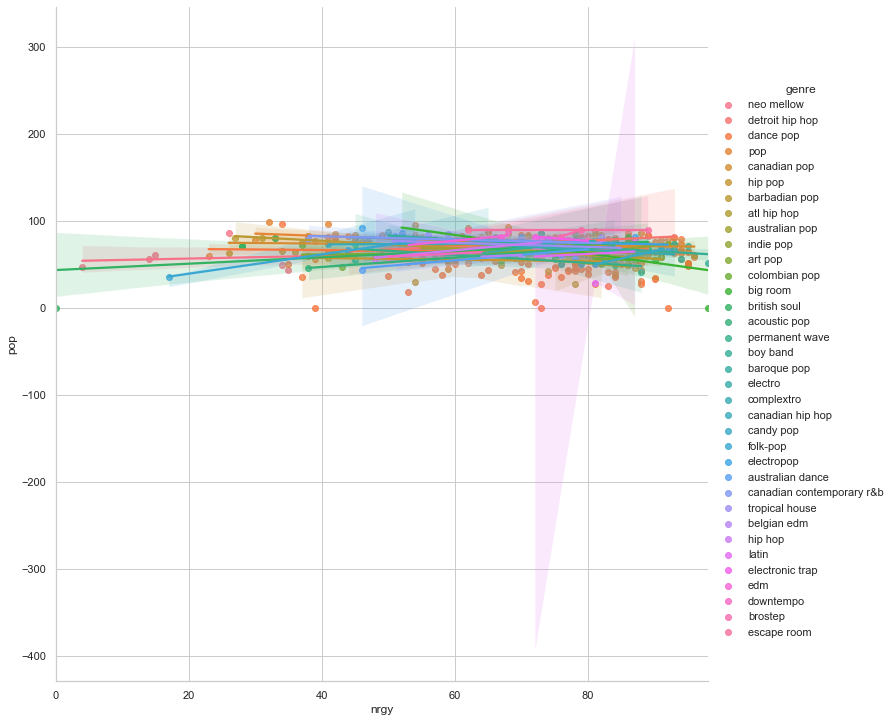

<function __main__.figura_3()>

In [138]:
# En el siguiente plot enseño la conexión entre el la energía que transmite la canción y su popularidad en base al género.   
def figura_3():
    sns.lmplot(x="nrgy",y="pop",data=df,size=10,hue="genre")

    plt.plot()
    plt.show()
    return(figura_3)
figura_3()

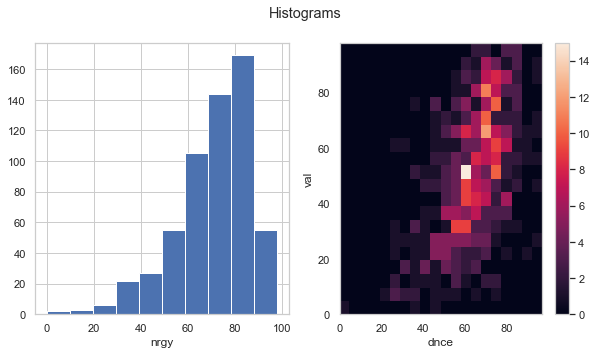

<function __main__.figura_4()>

In [140]:
# Aquí un poco más de lo mismo, pero lo separo en dos, cuanto mas energía transmite mas bailable es
def figura_4():
    x = "dnce"
    y = "val"

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
    fig.suptitle("Histograms")
    h = ax2.hist2d(df[x], df[y], bins=20)
    ax1.hist(df["nrgy"])

    ax2.set_xlabel(x)
    ax2.set_ylabel(y)

    ax1.set_xlabel("nrgy")

    plt.colorbar(h[3], ax=ax2)

    plt.show()
    return(figura_4)
figura_4()

<function __main__.figura_5()>

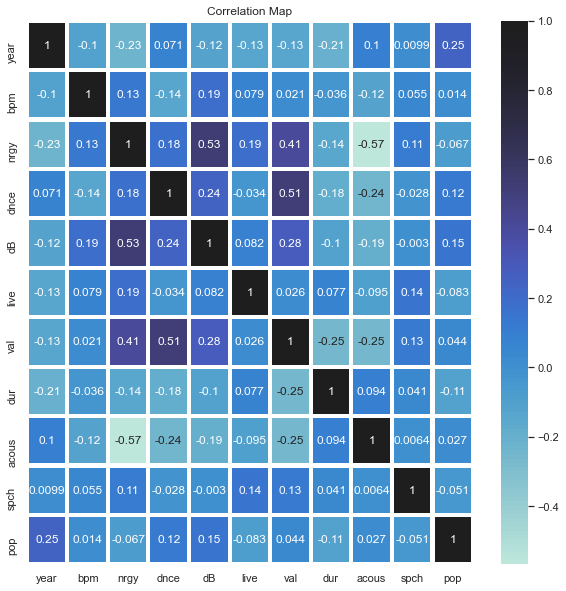

In [141]:
def figura_5():
    plt.figure(figsize=(10,10))
    plt.title('Correlation Map')
    ax=sns.heatmap(df.corr(),
                   linewidth=3.1,
                   annot=True,
                   center=1)
    return(figura_5)
figura_5()